In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Importing our csv
df = pd.read_csv("https://raw.githubusercontent.com/dymarczykm1/dymarczykm1/main/Data/data_cleaned.csv")

In [3]:
# Checking data
df.head()

,0,player_id,tm,pos,player,season,week,NFL_draft_year,NFL_draft_round,NFL_draft_rank,...,receiving_td,receiving_rec,receiving_tar,rushing_att,rushing_td,rushing_yds,fumbles_lost,half_ppr_fantasy_points,ppr_fantasy_points,standard_fantasy_points
0,0,2755,NYG,WR,Rueben Randle,2014,9,2012.0,2.0,63.0,...,0,4,11,0,0,0,0,6.9,8.9,4.9
1,1,2755,NYG,WR,Rueben Randle,2014,10,2012.0,2.0,63.0,...,0,5,10,0,0,0,0,6.4,8.9,3.9
2,2,2755,NYG,WR,Rueben Randle,2014,11,2012.0,2.0,63.0,...,0,7,15,0,0,0,0,14.7,18.2,11.2
3,3,2755,NYG,WR,Rueben Randle,2014,12,2012.0,2.0,63.0,...,0,3,3,0,0,0,0,5.1,6.6,3.6
4,4,2755,NYG,WR,Rueben Randle,2014,13,2012.0,2.0,63.0,...,0,3,4,0,0,0,0,6.7,8.2,5.2


In [4]:
# Looking at how many years we have
df['season'].min(), df['season'].max()

(2000, 2019)

In [5]:
# Removing the redundant column
df = df.iloc[:, 1:]

In [6]:
# Importing numpy for the agg function. Numpy is quicker than pandas in terms of calculation.
import numpy as np

df = df.groupby(['player_id', 'tm', 'player', 'pos', 'season'], as_index=False)\
    .agg({
    'offensive_snapcount': np.sum,
    'offensive_snapcount_percentage': np.mean,
    'passing_rating': np.mean,
    'passing_yds': np.sum,
    'passing_td': np.sum,
    'passing_att': np.sum,
    'receiving_yds': np.sum,
    'receiving_td': np.sum,
    'receiving_rec': np.sum,
    'receiving_tar': np.sum,
    'rushing_att': np.sum,
    'standard_fantasy_points': np.sum,
    'ppr_fantasy_points': np.sum,
    'half_ppr_fantasy_points': np.sum
})

df.head()

,player_id,tm,player,pos,season,offensive_snapcount,offensive_snapcount_percentage,passing_rating,passing_yds,passing_td,passing_att,receiving_yds,receiving_td,receiving_rec,receiving_tar,rushing_att,standard_fantasy_points,ppr_fantasy_points,half_ppr_fantasy_points
0,2,CHI,Justin Gage,WR,2003,0.0,NaN,0.0,0,0,0,338,2,17,35,0,45.8,62.8,54.3
1,2,CHI,Justin Gage,WR,2004,0.0,NaN,0.0,0,0,0,156,0,12,28,0,15.6,27.6,21.6
2,2,CHI,Justin Gage,WR,2005,0.0,NaN,0.0,0,0,0,346,2,31,55,0,46.6,77.6,62.1
3,2,CHI,Justin Gage,WR,2006,0.0,NaN,0.0,0,0,0,68,0,4,8,0,6.8,10.8,8.8
4,2,OTI,Justin Gage,WR,2007,0.0,NaN,0.0,0,0,0,750,2,55,85,0,87.0,142.0,114.5


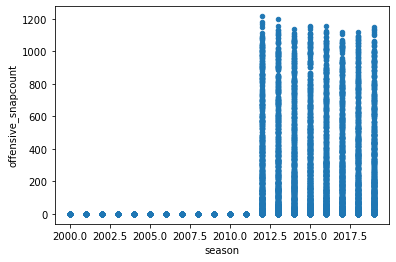

In [7]:
# snapcounts started in 2012
df.plot(x='season', y='offensive_snapcount', kind='scatter');

In [8]:
#only keeping 2012 (when snapcounts started). We'll remove 2019 data later.
df = df.loc[(df['season'] >= 2012)]

df.shape

(4786, 19)

In [9]:
pd.set_option('chained_assignment', None)

lag_features = ['rushing_att', 
                'receiving_tar', 
                'offensive_snapcount', 
                'offensive_snapcount_percentage',
                'ppr_fantasy_points',
                'passing_rating',
                'passing_att', 
                'passing_td']

for lag in range(1, 6):
    
    shifted = df.groupby('player_id').shift(lag)
    
    for column in lag_features:
        """
        Python f-strings are similar to using the format string method, although a bit cleaner
        """
        
        df[f'lag_{column}_{lag}'] = shifted[column]
        
df = df.fillna(-1)


In [10]:
# Correlation matrix of lagged variables
df.corr()[['ppr_fantasy_points']]

,ppr_fantasy_points
player_id,-0.164576
season,-0.011656
offensive_snapcount,0.892725
offensive_snapcount_percentage,0.780541
passing_rating,0.313380
passing_yds,0.467768
passing_td,0.478292
passing_att,0.458360
receiving_yds,0.679074
receiving_td,0.603843


In [11]:
# Correlation matrix for just WR
df.loc[df['pos'] == 'WR'].corr()[['ppr_fantasy_points']]

,ppr_fantasy_points
player_id,-0.216103
season,-0.049934
offensive_snapcount,0.920471
offensive_snapcount_percentage,0.825539
passing_rating,0.170908
passing_yds,0.135889
passing_td,0.145277
passing_att,0.182629
receiving_yds,0.989402
receiving_td,0.899715


In [12]:
# Correlation matrix for just RB
df.loc[df['pos'] == 'RB'].corr()[['ppr_fantasy_points']]

,ppr_fantasy_points
player_id,-0.098683
season,0.030287
offensive_snapcount,0.921137
offensive_snapcount_percentage,0.826742
passing_rating,0.147648
passing_yds,0.134518
passing_td,0.135815
passing_att,0.157270
receiving_yds,0.859607
receiving_td,0.637106


In [14]:
# Creating a df for WR
wr_df = df.loc[(df['pos'] == 'WR') & (df['season'] < 2019)]
wr_df.shape

(1570, 59)

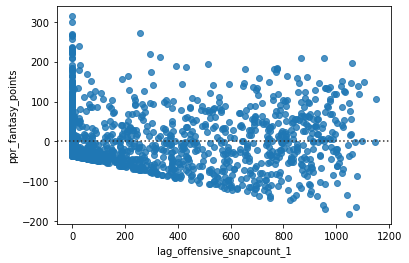

In [15]:
# PLotting residuals
sns.residplot(x=wr_df['lag_offensive_snapcount_1'], y=wr_df['ppr_fantasy_points']);

In [16]:
# Making sure we include only players with snap counts greater than 50.
wr_df = wr_df.loc[wr_df['lag_offensive_snapcount_1'] > 50]
wr_df.shape

(865, 59)

In [17]:
"""
This is our feature matrix. Using .values returns an array. y is what we are trying to predict and X is what 
we believe predicts Y.
"""

X = wr_df[[
    'lag_receiving_tar_1', 'lag_offensive_snapcount_1', 'lag_ppr_fantasy_points_1'
]].values

y = wr_df['ppr_fantasy_points'].values

X.shape, y.shape


((865, 3), (865,))

In [18]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# split up our data in to 20% testing, 80% training
# train_test_split documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# sklearn.linear_model.LinearRegression documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
lr = LinearRegression()

# train the algorithm
# the fit method documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
lr.fit(X_train, y_train)

"""
Predicted values based off testing data. We are going to compare these predicted values to 
real world values and try to quantify the difference between our model and reality
"""
# predict method documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
y_pred = lr.predict(X_test)

"""
A mean absolute error of 47 means our model was on average off by 47 fantasy points, or 3 points per game.
This is about what we'd expect from such a simple model.
"""
# mean_absolute_error documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
mean_absolute_error(y_pred, y_test)

47.72392732090525

In [19]:
pd.set_option('display.max_rows', None)

wr_df_pred = df.loc[
    (df['pos'] == 'WR') & (df['offensive_snapcount'] > 50) & (df['season'] == 2019), 
    ['player', 'receiving_tar', 'offensive_snapcount', 'ppr_fantasy_points']
]

wr_df_pred['predicted_2020'] = lr.predict(wr_df_pred[['receiving_tar', 'offensive_snapcount', 'ppr_fantasy_points']].values)

wr_df_pred.sort_values(by='predicted_2020', ascending=False).head(100)


,player,receiving_tar,offensive_snapcount,ppr_fantasy_points,predicted_2020
7143,Michael Thomas,185,942.0,374.60,284.761170
4745,Julio Jones,157,812.0,274.10,216.701530
7597,Chris Godwin,120,937.0,276.10,215.175665
7520,Cooper Kupp,134,886.0,270.50,212.552721
5952,DeAndre Hopkins,150,971.0,268.54,212.008803
5997,Keenan Allen,149,931.0,261.50,207.410245
2892,Julian Edelman,153,1003.0,256.28,203.962208
6301,Allen Robinson,154,1003.0,254.90,203.112221
7489,Kenny Golladay,116,937.0,248.00,196.272113
6863,DeVante Parker,128,906.0,246.20,195.970438
